In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [4]:
import plotly.graph_objs as go

In [5]:
import pandas as pd
import io
from google.colab import files

In [6]:
url = 'https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv'

In [7]:
final_data = pd.read_csv(url)

In [8]:
final_data = final_data.replace(to_replace ="FAKE",
                 value =1)



In [9]:
final_data = final_data.replace(to_replace ="REAL",
                 value =0)


In [10]:


# merge them into one file
df = final_data.copy()
df = df.reset_index()
# don't forget to shuffle them. 
# Otherwise all news are on top and all fakes are on the bottom
df = df.sample(frac=1)

In [11]:
df

index    id  ...                                               text label
3228   3228  3791  ...  Police responded to reports of gunshots at abo...     0
3770   3770  1355  ...  Killing Obama administration rules, dismantlin...     0
6063   6063   338  ...  (CNN) Investigators think a woman who worked w...     0
5495   5495  1830  ...  Lyon County gave the former Pennsylvania Senat...     0
5658   5658  7286  ...  Goldman Sachs Endorses Hillary Clinton For Pre...     1
...     ...   ...  ...                                                ...   ...
4945   4945  5172  ...  Donald Trump on Tuesday channeled more than a ...     0
3433   3433  4792  ...  Donald Trump appeared to use his foundation to...     0
1927   1927  1095  ...  Three days before Florida’s climactic primary,...     0
1916   1916  1817  ...  The president refuses to say he’d hold to the ...     0
1387   1387  9211  ...  Trump rape accuser skips press conference, cit...     1

[6335 rows x 5 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



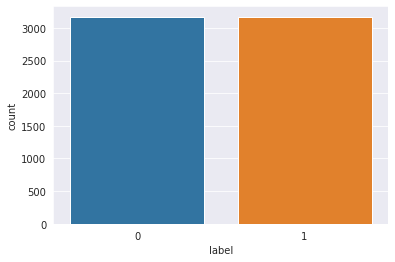

In [12]:
sns.set_style("darkgrid")
sns.countplot(df.label)

# Data Cleaning

In [13]:
df['text']=df['title']+' '+df['text']

In [14]:
df = df.drop(['id','title'], axis=1)

In [15]:
df.head()

index                                               text  label
3228   3228  3 Members Of Muslim Family Shot Dead In Chapel...      0
3770   3770  Everything you need to know about the next Dem...      0
6063   6063  Escaped killers' ride backed out, source says ...      0
5495   5495  Rick Santorum hopes 99-county Iowa tour leads ...      0
5658   5658  Goldman Sachs Endorses Hillary Clinton For Pre...      1

In [16]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
import string
import nltk
import re,string,unicodedata
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [20]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def rem_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = rem_punctuation(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

# Applying 5-6 algo with TF_IDF and Countvectorizer using n-gram

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

In [ ]:
print("******USING STEMMED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.3, random_state= 0)
classifiers = [ LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5)]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(ngram_range=(1,2), max_df = 5), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(ngram_range=(1,2), max_df = 5), classifier, X_train, X_test, y_train, y_test)

******USING STEMMED TEXT********


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
***********Usng Count Vectorizer****************
Accuarcy: 84.74
Confusion Matrix: 
 [[931  30]
 [260 680]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.97      0.87       961
           1       0.96      0.72      0.82       940

    accuracy                           0.85      1901
   macro avg       0.87      0.85      0.84      1901
weighted avg       0.87      0.85      0.84      1901

***********Usng TFIDF Vectorizer****************
Accuarcy: 89.79
Confusion Matrix: 
 [[911  50]
 [144 796]]
Classification Report: 
               precision    recall  f1-score  

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuarcy: 73.28
Confusion Matrix: 
 [[932  29]
 [479 461]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.97      0.79       961
           1       0.94      0.49      0.64       940

    accuracy                           0.73      1901
   macro avg       0.80      0.73      0.72      1901
weighted avg       0.80      0.73      0.72      1901

***********Usng TFIDF Vectorizer****************
Accuarcy: 89.69
Confusion Matrix: 
 [[909  52]
 [144 796]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       961
           1       0.94      0.85      0.89       940

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901



 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None,